In [ ]:
#1st part of the problem is to predict the average price which is a regression model

In [383]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import scipy
import joblib
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [287]:
#Lets read the csv file
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [288]:
# lets create a dataframe
Avocado=pd.DataFrame(data=df)
Avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [289]:
#Lets drop the Unammed column as it is just indexing and also date column as it seems of no value here
Avocado.drop(["Unnamed: 0","Date"],axis=1,inplace=True)

In [290]:
Avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [291]:
#Lets find total number of rows and column
Avocado.shape
#total number of rows are 18249 and 12 columns

(18249, 12)

In [292]:
#Lets list the columns
Avocado.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [293]:
Avocado.dtypes
#Attributes are either float types or integer or object type

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [294]:
#Lets find for missing values if any
Avocado.isnull().sum()
#There are no missing values

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

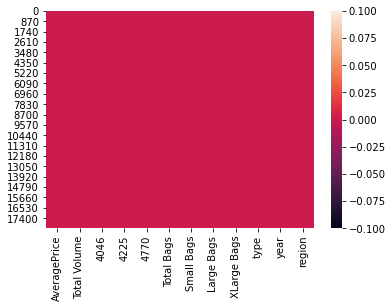

In [295]:
#lets use heat map to confirm if that there are no missing values
sns.heatmap(Avocado.isnull())
#It confirms that there are no missing values

In [296]:
le1=LabelEncoder()
Avocado["type"]=le1.fit_transform(Avocado["type"])
print(Avocado["type"])
print(Avocado["type"].value_counts())

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32
0    9126
1    9123
Name: type, dtype: int64


In [297]:
le2=LabelEncoder()
Avocado["region"]=le2.fit_transform(Avocado["region"])
print(Avocado["region"])
print(Avocado["region"].value_counts())

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32
47    338
31    338
6     338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
27    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
11    338
23    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
53    335
Name: region, dtype: int64


In [298]:
Avocado.describe()
#standard deviation for most attributes except for average price and year is high
#outliers could be present in 4770 column
#there is some amount of skewness present is almost all attributes since there is a noticeable difference between the mean and the median

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


In [299]:
#Lets find the correlation between the independent variables and the target variables using heat map

In [300]:
Avocado1=Avocado.corr()
Avocado1["AveragePrice"].sort_values(ascending=False)
#All attributes can be retained 

AveragePrice    1.000000
type            0.615845
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

In [301]:
#Lets perform univariate analysis

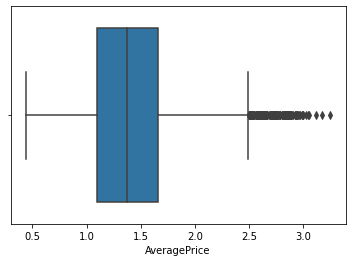

In [302]:
AveragePice1=sns.boxplot(Avocado["AveragePrice"])
#Outliers are present
#minimum is value is 0.44. Median value is 1.37 and maximum value is 3.25

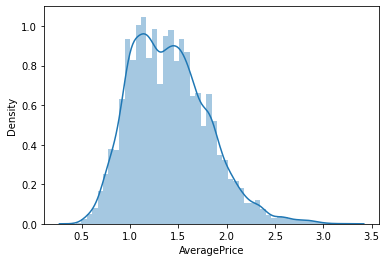

In [303]:
AveragePice2=sns.distplot(Avocado["AveragePrice"])
#Maximum density of average price lies between 0.75 to 1.75
#SLight skewness is present to the right

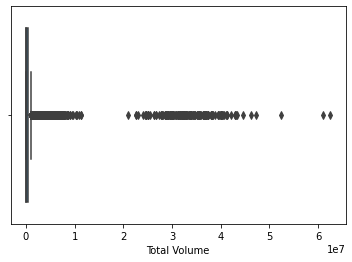

In [304]:
Total_Volume1=sns.boxplot(Avocado["Total Volume"])
#Outliers are present
#minimum is value is 8.4*10^6. Median value is 1.07*10^5 and maximum value is 6.3*10^7

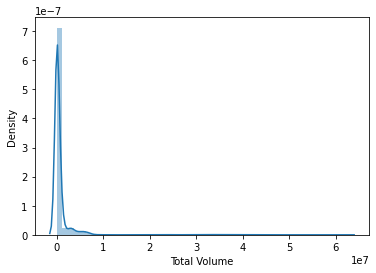

In [305]:
Total_Volume2=sns.distplot(Avocado["Total Volume"])
#Maximum density of average price lies between 0. to 0.1
#skewness is present to the right

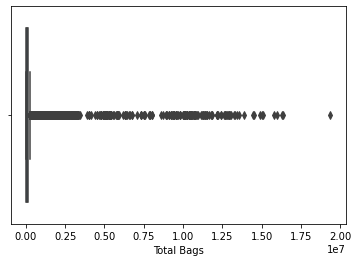

In [306]:
Total_Bags1=sns.boxplot(Avocado["Total Bags"])
#Outliers are present


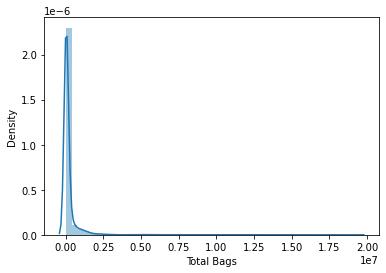

In [307]:
Total_Bags2=sns.distplot(Avocado["Total Bags"])
#skewness is present to the right

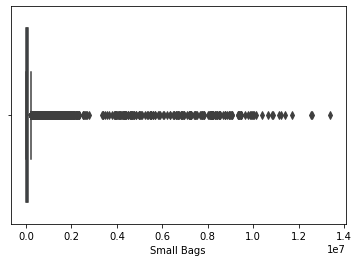

In [308]:
Small_Bags1=sns.boxplot(Avocado["Small Bags"])
#Outliers are present

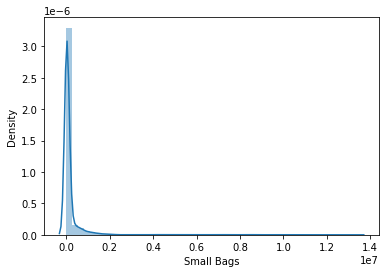

In [309]:
Small_Bags2=sns.distplot(Avocado["Small Bags"])
#skewness is present to the right

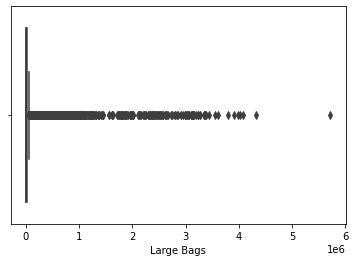

In [310]:
Large_Bags1=sns.boxplot(Avocado["Large Bags"])
#Outliers are present

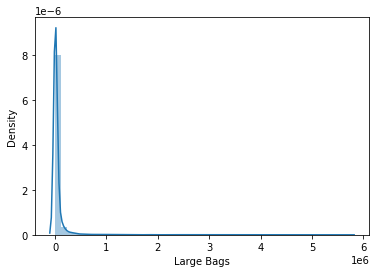

In [311]:
Large_Bags2=sns.distplot(Avocado["Large Bags"])
#skewness is present to the right

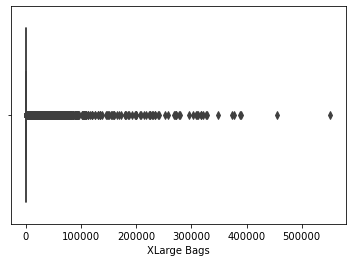

In [312]:
X_Large_Bags1=sns.boxplot(Avocado["XLarge Bags"])
#Outliers are present

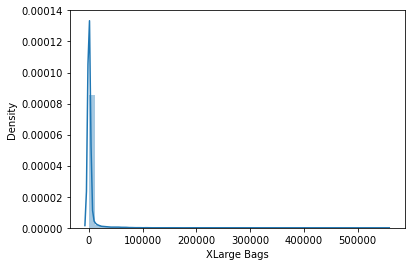

In [313]:
X_Large_Bags2=sns.distplot(Avocado["XLarge Bags"])
#skewness is present to the right

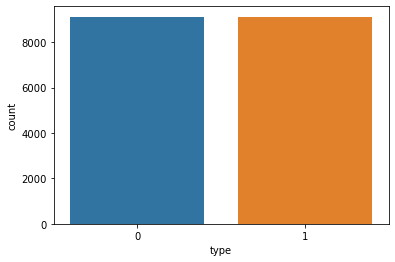

In [314]:
Type=sns.countplot(Avocado["type"])
#conventional count corresponds to 0 and organic count corresponds to 1

In [315]:
#lets perform bivariate analysis

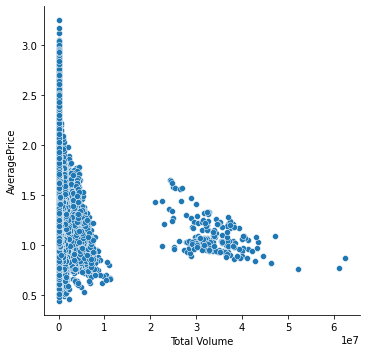

In [316]:
Total_Volume=sns.relplot(x="Total Volume",y="AveragePrice",kind="scatter",data=Avocado)
#No concrete conclusion can be drawn

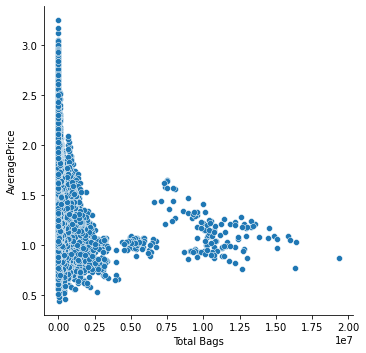

In [317]:
Total_Bags=sns.relplot(x="Total Bags",y="AveragePrice",kind="scatter",data=Avocado)
#No concrete conclusion can be drawn

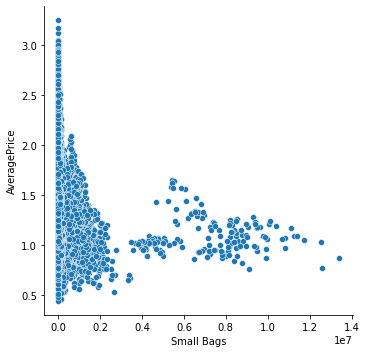

In [318]:
Small_Bags=sns.relplot(x="Small Bags",y="AveragePrice",kind="scatter",data=Avocado)
#No concrete conclusion can be drawn

In [319]:
#lets use zscore to treat outliers

In [320]:
zscore(Avocado)

array([[-0.18868864, -0.22771641, -0.23081597, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.13901962, -0.23042664, -0.23110251, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-1.18206895, -0.21208462, -0.23100731, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [321]:
z=np.abs(zscore(Avocado))

In [322]:
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [323]:
Avocado_New=Avocado[(z<3).all(axis=1)]
Avocado_New.shape

(17651, 12)

In [324]:
#Since the data loss is around 3.5% we can use the new dataset created after the removal of outliers

In [325]:
#lets now check for skewness
Avocado_New.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [326]:
Avocado_New["Total Volume"]=power_transform(Avocado_New["Total Volume"].values.reshape(-1,1))

In [327]:
Avocado_New["4046"]=power_transform(Avocado_New["4046"].values.reshape(-1,1))

In [328]:
Avocado_New["4225"]=power_transform(Avocado_New["4225"].values.reshape(-1,1))

In [329]:
Avocado_New["4770"]=power_transform(Avocado_New["4770"].values.reshape(-1,1))

In [330]:
Avocado_New["Total Bags"]=power_transform(Avocado_New["Total Bags"].values.reshape(-1,1))

In [331]:
Avocado_New["Small Bags"]=power_transform(Avocado_New["Small Bags"].values.reshape(-1,1))

In [332]:
Avocado_New["Large Bags"]=power_transform(Avocado_New["Large Bags"].values.reshape(-1,1))

In [333]:
Avocado_New["XLarge Bags"]=power_transform(Avocado_New["XLarge Bags"].values.reshape(-1,1))

In [334]:
#lets check for the skewness again
Avocado_New.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [335]:
#Before performing ML for the 1st part of the problem lets separate x and y

In [336]:
x=Avocado_New.drop("AveragePrice",axis=1)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,0,2015,0
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,0,2015,0
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,0,2015,0
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,0,2015,0
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1,2018,53
18245,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1,2018,53
18246,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1,2018,53
18247,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1,2018,53


In [337]:
y=Avocado_New["AveragePrice"]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [338]:
#Lets use standardization to scale the x
S=StandardScaler()
x=S.fit_transform(x)
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -1.01904715,
        -1.21001338, -1.69549505],
       [-0.14749743, -0.77717852,  0.26951276, ..., -1.01904715,
        -1.21001338, -1.69549505],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -1.01904715,
        -1.21001338, -1.69549505],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  0.98130886,
         1.98075592,  1.74705401],
       [-0.70179733, -0.54701087, -0.71637127, ...,  0.98130886,
         1.98075592,  1.74705401],
       [-0.66738095, -0.35967077, -0.79165015, ...,  0.98130886,
         1.98075592,  1.74705401]])

In [339]:
#lets perform train test split on the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12355, 11)
(5296, 11)
(12355,)
(5296,)


In [340]:
#Lets use four algorithms to check the r2 score. The algorithms used are: 1) SVR,2) KNN,3)Lasso,4)Ridge

In [341]:
svm=SVR()
svm.fit(x_train,y_train)
#lets predict y values
pred1=svm.predict(x_test)
print(r2_score(y_test,pred1))
score1=cross_val_score(svm,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.7168592147740432
[-0.68465062  0.28321852  0.08024387  0.31187089  0.04558892]
0.0072543170941614665
0.3617946830402265


In [342]:
#2)KNN
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
#predict y_values
pred2=knn.predict(x_test)
print(r2_score(y_test,pred2))
score2=cross_val_score(knn,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.8302690046298988
[-0.18139023  0.24547598  0.4028842   0.2589234  -0.12991056]
0.11919655761520291
0.23167025219836174


In [343]:
#3) Lasso
ls=Lasso()
ls.fit(x_train,y_train)
#predict y_values
pred3=ls.predict(x_test)
print(r2_score(y_test,pred3))
score3=cross_val_score(ls,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

-2.1054176384982526e-05
[-3.85189856 -0.63909317 -0.04763459 -0.44449249 -0.80022956]
-1.156669674837169
1.3708646092588772


In [351]:
#4) RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
#predict y_values
pred4=rf.predict(x_test)
print(r2_score(y_test,pred4))
score4=cross_val_score(rf,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.8417463434418841
[0.18313981 0.29533625 0.57849258 0.29885283 0.01911632]
0.2749875598764616
0.1827594152164233


In [ ]:
# Randomforest is the best fit model as the difference between the r2_score and cross_val_score mean is the least. 
#Lets perform hypertuning to increase the r2_score

In [357]:
parameters={"n_estimators":[10,20,50,100],"criterion":["squared_error","absolute_error","poisson"],"bootstrap":[True,False],"random_state":[42,30,50,80]}
rsearch=RandomizedSearchCV(rf,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'n_estimators': [10, 20, 50, 100],
                                        'random_state': [42, 30, 50, 80]})

In [358]:
print(rsearch.best_estimator_)
print(rsearch.best_score_)
print(rsearch.best_params_)

RandomForestRegressor(criterion='poisson', random_state=30)
0.646003522234329
{'random_state': 30, 'n_estimators': 100, 'criterion': 'poisson', 'bootstrap': True}


In [359]:
#lets apply these parameters to the best fit model which is randomforest

In [360]:
rf1=RandomForestRegressor()
rf1.fit(x_train,y_train)
#predict y_values
pred5=rf.predict(x_test)
print(r2_score(y_test,pred5))

0.8417463434418841


In [363]:
#Lets searilise this model and save it for further use
joblib.dump(rf,"rf.obj")

['rf.obj']

In [364]:
#2) Now we address the second half of the problem that is to find the region which makes it a classification problem

In [378]:
Avocado_New["region"].value_counts()


38    338
10    338
16    338
32    338
49    338
2     338
18    338
34    338
19    338
35    338
4     338
5     338
23    338
39    338
8     338
9     338
0     338
26    338
11    338
44    338
30    338
12    338
27    338
13    338
28    337
1     337
20    337
41    336
14    336
50    336
33    336
40    336
24    335
31    335
25    333
21    333
48    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

In [365]:
#lets separate the independent and dependent variables as c and d

In [366]:
c=Avocado_New.drop("region",axis=1)
c

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,0,2015
1,1.35,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,0,2015
2,0.93,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,0,2015
3,1.08,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,0,2015
4,1.28,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1,2018
18245,1.71,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1,2018
18246,1.87,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1,2018
18247,1.93,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1,2018


In [368]:
d=Avocado_New["region"]
d

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [369]:
#lets use standard scaler to scale down c

In [373]:
S1=StandardScaler()
c=S1.fit_transform(c)
c

array([[-0.19535234, -0.07532391, -0.65742071, ..., -0.67791909,
        -1.01904715, -1.21001338],
       [-0.1435096 , -0.14749743, -0.77717852, ..., -0.67791909,
        -1.01904715, -1.21001338],
       [-1.2322071 ,  0.20555557, -0.7317763 , ..., -0.67791909,
        -1.01904715, -1.21001338],
       ...,
       [ 1.20440158, -0.77527398, -0.61796649, ..., -0.67791909,
         0.98130886,  1.98075592],
       [ 1.35992979, -0.70179733, -0.54701087, ..., -0.67791909,
         0.98130886,  1.98075592],
       [ 0.55636736, -0.66738095, -0.35967077, ..., -0.67791909,
         0.98130886,  1.98075592]])

In [374]:
c_train,c_test,d_train,d_test=train_test_split(c,d,test_size=0.3,random_state=42)
print(c_train.shape)
print(c_test.shape)
print(d_test.shape)
print(d_train.shape)

(12355, 11)
(5296, 11)
(5296,)
(12355,)


In [381]:
#Lets use four algorithms to check the accuracy score. The algorithms used are: 1)KNN,2)SVC,3)Adaboost,4)RandomForest

In [385]:
#1)knn
knn2=KNeighborsClassifier()
knn2.fit(c_train,d_train)
#lets predict the d values
pred6=knn2.predict(c_test)
print(accuracy_score(d_test,pred6))
print(classification_report(d_test,pred6))
print(confusion_matrix(d_test,pred6))
score5=cross_val_score(knn2,c,d,cv=5)
print(score5)
print(score5.mean())
print(score5.std())

0.8389350453172205
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       103
           1       0.64      0.81      0.71        99
           2       0.92      0.98      0.95       100
           3       0.84      0.78      0.81       100
           4       0.92      0.88      0.90       103
           5       0.83      0.77      0.80       105
           6       0.98      0.96      0.97        89
           7       0.80      0.86      0.83       113
           8       0.92      0.95      0.93        94
           9       0.80      0.69      0.74       113
          10       0.60      0.74      0.66        92
          11       0.85      0.97      0.91       113
          12       0.92      0.93      0.93       104
          13       0.68      0.82      0.74        92
          14       0.88      0.94      0.91       111
          15       0.95      0.96      0.96        84
          16       0.93      0.91      0.92       106
        

In [388]:
#2)support vector machine
svc=SVC()
svc.fit(c_train,d_train)
#lets predict the d values
pred7=svc.predict(c_test)
print(accuracy_score(d_test,pred7))
score6=cross_val_score(svc,c,d,cv=5)
print(score6)
print(score6.mean())


0.808345921450151
[0.62305296 0.71416431 0.70311615 0.65552408 0.47280453]
0.633732404931473


In [389]:
#3)Adaboost
ad2=AdaBoostClassifier()
ad2.fit(c_train,d_train)
#lets predict d values
pred8=ad2.predict(c_test)
print(accuracy_score(d_test,pred8))
score7=cross_val_score(ad2,c,d,cv=5)
print(score7)
print(score7.mean())

0.04305135951661632
[0.04021524 0.06203966 0.07167139 0.07252125 0.0611898 ]
0.06152746655883984


In [390]:
#4) RandomForest
rf3=RandomForestClassifier()
rf3.fit(c_train,d_train)
#lets predict d values
pred9=rf3.predict(c_test)
print(accuracy_score(d_test,pred9))
score8=cross_val_score(rf3,c,d,cv=5)
print(score8)
print(score8.mean())

0.8974697885196374
[0.62843387 0.80566572 0.75524079 0.69971671 0.49206799]
0.6762250179109673


In [392]:
#randomforest classifier is the best fit model.

In [405]:
parameters1={"n_estimators":[10,20,50,100],"criterion":["gini","entropy"],"bootstrap":[True,False],"random_state":[42,30,50,80]}
rsearch1=RandomizedSearchCV(rf3,parameters1)
rsearch1.fit(c_train,d_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'n_estimators': [10, 20, 50, 100],
                                        'random_state': [42, 30, 50, 80]})

In [406]:
print(rsearch1.best_estimator_)
print(rsearch1.best_params_)
print(rsearch1.best_score_)

RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=30)
{'random_state': 30, 'n_estimators': 100, 'criterion': 'entropy', 'bootstrap': False}
0.8940509915014164


In [407]:
#lets put these values back to the best fit model

rf4=RandomForestClassifier(criterion="entropy",random_state=30,n_estimators=100,bootstrap=False)
rf4.fit(c_train,d_train)
#lets predict d values
pred10=rf4.predict(c_test)
print(accuracy_score(d_test,pred10))

0.9031344410876133


In [408]:
#lets perform serializationto dump the model
joblib.dump(rf4,"rf4.obj")

['rf4.obj']